In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

from train import train_MSAP
from dist_matrix import gen_dist_matrix

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

from data.coupled_oscillator import create_trajectories

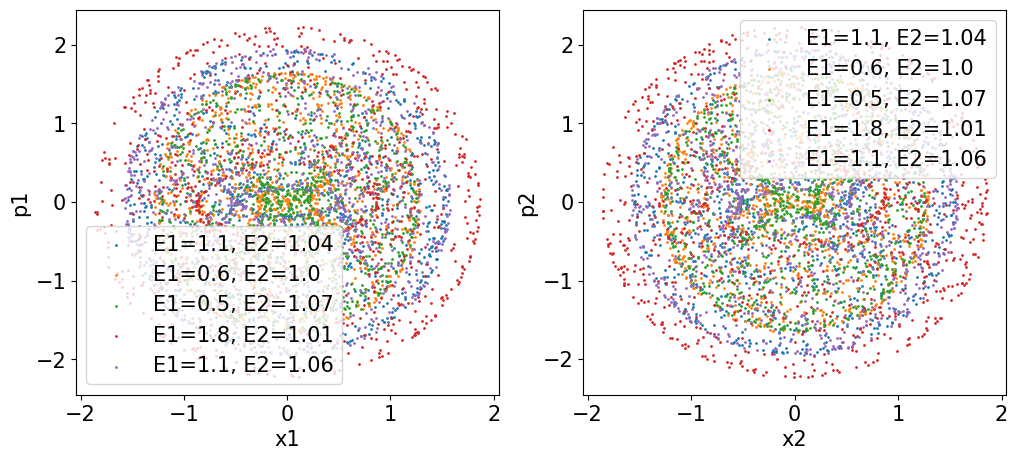

In [2]:
data, E1, E2 = create_trajectories(E1_rng=(0.2, 2), E2_rng=(1.0, 1.1)) # create data with small variance in E2
E = np.stack((E1, E2), axis=1)

idx = np.random.choice(range(len(data)), size=5)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i in [0, 1]:
    for j in idx:
        axes[i].scatter(*data[j][:, [i, i + 2]].T, s=1, label=f"E1={round(E[j][0], 1)}, E2={round(E[j][1], 2)}")
    axes[i].set_xlabel(f"x{i + 1}")
    axes[i].set_ylabel(f"p{i + 1}")
    axes[i].legend()

plt.savefig("graphs/co_traj.pdf")

plt.show()

In [3]:
name = "co_degenerate"
data = StandardScaler().fit_transform(data.reshape(data.shape[0] * data.shape[1], -1)).reshape(data.shape)
dmat = gen_dist_matrix(data, name=f"data/{name}")
name += "4"

valid_size = len(dmat) // 5
train_size = len(dmat) - valid_size

train_idx, valid_idx = train_test_split(torch.arange(len(dmat)), test_size=valid_size)

dmat = torch.tensor(dmat, dtype=torch.float32)
train_dmat = dmat[train_idx[:, None], train_idx[None, :]]
valid_dmat = dmat[valid_idx[:, None], train_idx[None, :]]

Finished preprocessing 200 events in 0.0029s
   1990 / 19900  EMDs computed  -  10.00% completed - 27.372s
   3980 / 19900  EMDs computed  -  20.00% completed - 54.764s
   5970 / 19900  EMDs computed  -  30.00% completed - 81.460s
   7960 / 19900  EMDs computed  -  40.00% completed - 109.359s
   9950 / 19900  EMDs computed  -  50.00% completed - 136.490s
  11940 / 19900  EMDs computed  -  60.00% completed - 163.030s
  13930 / 19900  EMDs computed  -  70.00% completed - 189.917s
  15920 / 19900  EMDs computed  -  80.00% completed - 216.129s
  17910 / 19900  EMDs computed  -  90.00% completed - 242.773s
  19900 / 19900  EMDs computed  - 100.00% completed - 269.732s


In [4]:
cfg = {
    "target_dim": 10,
    "intermediate_dim": 16,
    "intermediate_layers": 2,
}

models_co, losses_co = train_MSAP(train_dmat, valid_dmat, cfg, name, min_delta=0.1, patience=50, project_name="MSAP", N_inits=2)

latent_dim: 1
init #1


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: antonii-belyshev (ai-prentice). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 474   
------------------------------------
675       Trainable params
0         Non-trainable params
675       Total params
0.003     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.05585893616080284
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▂▂▂▁▁▂▂▁▂▁▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
p,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▄▁▁▁▁▁▁
r1,▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▄▅▅▅▆▆▆▆▆██████████▇█████
r2,███▇▆▅▄▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂
stress,█▂▂▂▁▁▂▂▁▂▂▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,132
loss,0.09044
p,1.1


init #2


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 474   
------------------------------------
675       Trainable params
0         Non-trainable params
675       Total params
0.003     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.09222204983234406
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▄▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁
p,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
r1,▁▂▄▅▆▇▇███████▇▇▇▇▆▆▆▆▆▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇
r2,▇███████▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▆▄▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▅▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,65
loss,0.11365
p,1.1




best validation loss over latent dim: 0.05585893616080284
---------------------------------------------------------------------------




latent_dim: 2
init #1


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 490   
------------------------------------
891       Trainable params
0         Non-trainable params
891       Total params
0.004     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.03368053957819939
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
p,█▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
r1,▁▁▂▂▂▃▃▃▃▃▃▃▃▃▃▃▄▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▆▇█
r2,▇███▇▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▄▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,84
loss,0.05698
p,1.1


init #2


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 490   
------------------------------------
891       Trainable params
0         Non-trainable params
891       Total params
0.004     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.02151835523545742
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▃▃▃▃▄▂▂▂▂▂▂▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁▂▁▁▁▂▁▁▂▁▁▁▁
p,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁
r1,▁▂▂▃▃▃▃▃▃▂▂▃▃▂▂▂▂▄▆▇▇███████████████████
r2,██▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▄▃▃▃▃▄▂▂▃▃▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▂▁▁▁▂▁▁▂▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▄▃▂▂▂▂▂▂▂▂▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,174
loss,0.03545
p,1.1




best validation loss over latent dim: 0.02151835523545742
---------------------------------------------------------------------------




latent_dim: 3
init #1


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 506   
------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.021720124408602715
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▃▄▃▃▃▂▂▂▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
p,█▅▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
r1,▁▂▃▄▄▅▅▆▆▆████▇▇▆▆▇▇▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
r2,███▇▇▆▆▅▅▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▃▂▃▂▂▃▂▂▂▂▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,90
loss,0.04013
p,1.1


init #2


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 506   
------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params
0.004     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.018605079501867294
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▄▃▄▃▂▂▂▃▃▂▂▂▃▂▁▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
p,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
r1,▁▂▃▃▃▃▃▃▃▂▂▂▂▂▂▃▆▆█▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
r2,█▇▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▃▃▄▃▄▄▂▂▂▃▃▂▂▂▃▂▁▁▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▄▄▄▄▄▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,196
loss,0.04016
p,1.1




best validation loss over latent dim: 0.018605079501867294
---------------------------------------------------------------------------




latent_dim: 4
init #1


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 522   
------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.024382729083299637
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▅▄▃▃▃▃▄▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▂▁▂▁▁▁▂▁▂▁▁▁▁▁▁▁
p,█▆▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
r1,▁▂▃▄▄▄▅▅▅██▇▇▇▆▆▆▆█▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
r2,█▇▆▆▅▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▄▄▃▃▃▃▃▄▂▂▂▂▃▁▂▂▂▁▁▁▁▁▁▂▁▂▁▂▂▂▁▂▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,89
loss,0.04628
p,1.1


init #2


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name    | Type    | Params
------------------------------------
0 | decoder | Decoder | 522   
------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training: 0it [00:00, ?it/s]



best validation loss: 0.021295038983225822
------------------------------------------------------------------------




wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▃▄▄▃▂▂▂▂▁▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
p,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁
r1,▁▃▃▃▃▄▄▄▄▄▄▃▃▃▂▂▂▂▃▆▇██▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
r2,█▇▆▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
stress,█▄▂▄▃▂▂▂▂▂▁▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
valid_loss,█▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,148
loss,0.06708
p,1.1




best validation loss over latent dim: 0.021295038983225822
---------------------------------------------------------------------------






# Loss curves

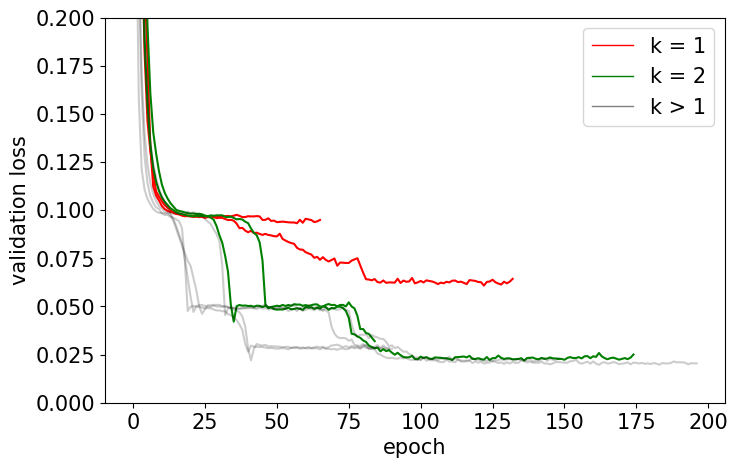

In [14]:
# to plot this graph you have to download the validation loss data from the wandb to the data folder


import pandas as pd
from matplotlib.lines import Line2D

learning_curves = pd.read_csv("data/co_degenerate_learning_curves.csv")

plt.figure(figsize=(8, 5))
epoch = learning_curves["epoch"]
for i in range(1, 5):
    c = "green" if i == 2 else ("red" if i == 1 else "black")
    alpha = 1 if i <= 2 else 0.2
    for init in range(1, 3):
        valid_loss = learning_curves[f"co_degenerate4; latent_dim: {i}, init #{init} - valid_loss"]
        plt.plot(epoch, valid_loss, c=c, alpha=alpha)

custom_lines = [Line2D([0], [0], color="red", lw=1),
                Line2D([0], [0], color="green", lw=1),
                Line2D([0], [0], color="gray", lw=1)]

plt.legend(custom_lines, ["k = 1", "k = 2", "k > 1"])

plt.ylim(0, 0.2)

plt.xlabel("epoch")
plt.ylabel("validation loss")

plt.savefig("graphs/co_learning_curves.pdf")

plt.show()

# Conserved quantities and latent representations

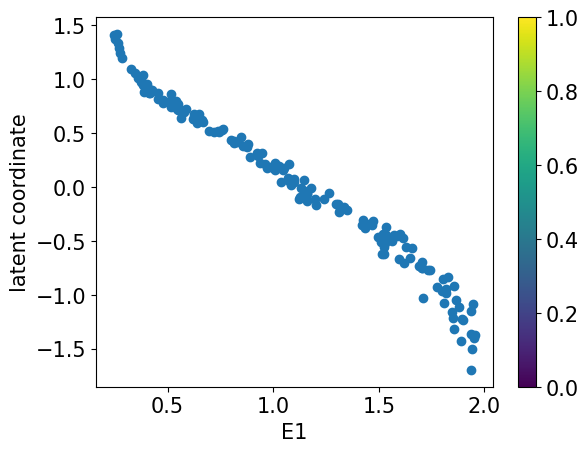

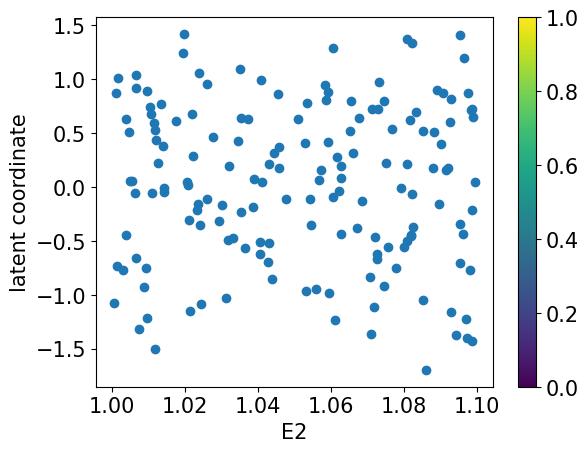

In [5]:
model1d = models_co[0]
for i in [0, 1]:
    plt.figure()
    plt.scatter(E[train_idx, i], *model1d.latent.cpu().detach().T)
    plt.xlabel(f"E{i + 1}")
    plt.ylabel(f"latent coordinate")
    plt.colorbar()
    # plt.title(f"colored by energy #{i + 1}")
    # plt.savefig(f"graphs/co_latent_E{i + 1}.pdf")

plt.show()

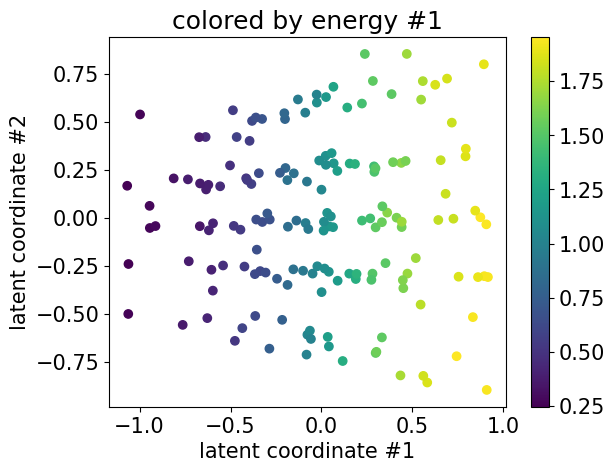

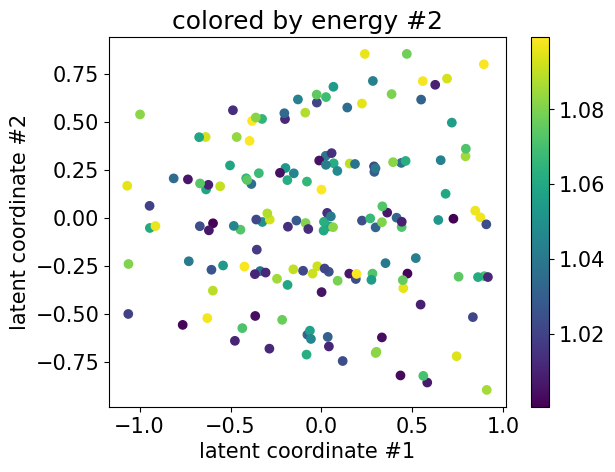

In [6]:
model2d = models_co[1]
for i in [0, 1]:
    plt.figure()
    plt.scatter(*model2d.latent.cpu().detach().T, c=E[train_idx, i])
    plt.xlabel(f"latent coordinate #1")
    plt.ylabel(f"latent coordinate #2")
    plt.colorbar()
    plt.title(f"colored by energy #{i + 1}")
    # plt.savefig(f"graphs/co_latent_E{i + 1}.pdf")

plt.show()